# 앙상블 학습

*  앙상블이란 여러 개의 알고리즘을 사용하여, 그 예측을 결합함으로써 보다 정확한 예측을 도출하는 기법



In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 유방암 데이터를 불러오세요. Hint: load_breast_cancer()
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 데이터 프렘임 상위 3개 행을 출력하세요.
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN를 각각 불러오세요.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기를 정의하세요.
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

# train_test_split을 이용하여 훈련 데이터와 테스트 데이터로 조건에 맞게 나누세요.
# 조건: test_size=0.2, random_state= 156
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 156)

In [ ]:
# VotingClassifier 학습/예측을하고, 정확도를 출력해보세요.
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


# 랜덤 포레스

*  랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤
최종적으로 모든 분류기가 보팅을 통해 예측 결정





데이터(human_activity)
  * 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처
를 수집한 데이터→ 수집된 피처 세트를 기반으로 어떠한 동작인지 예측

In [ ]:
# 구글 드라이브 마운트

import os
from google.colab import drive

drive.mount('/content/drive')
gdrive_dir = 'LG_Summer_School'

if not os.path.exists('/content/drive/My Drive/' + gdrive_dir):
  os.makedirs('/content/drive/My Drive/' + gdrive_dir)

os.chdir('/content/drive/My Drive/' + gdrive_dir)

data_path = '/content/drive/My Drive/' + gdrive_dir

print(data_path)

if not os.path.exists('/content/drive/My Drive'+gdrive_dir+'human_activity.zip'):
    !pip install pydrive
    print('\n\n')
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # Downloading the data from Google drive link
    data_zip = drive.CreateFile({'id':'1sffPusrI_q9EpgeiFSXIS467ldL4owB8'})
    data_zip.GetContentFile('human_activity.zip')
    !unzip -j 'human_activity.zip'

    print('\n ==> Succesfully downloaded and unzipped the data')

else:
    print('\n ==> Data have already been downloaded')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/LG_Summer_School



Archive:  human_activity.zip
replace features.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: features.txt            
replace features_info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: features_info.txt       
replace X_test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: X_test.txt              
replace y_test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: y_test.txt              
replace X_train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: X_train.txt             y

replace y_train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: y_train.txt             

 ==> Succesfully downloaded and unzipped the data


In [ ]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/LG_Summer_School/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 feature_name에 대한 처리
    feature_dup_df = feature_name_df.groupby('column_name').cumcount()
    feature_name_df['column_name'] = feature_name_df.apply(lambda x : x[1]+'_'+str(x[0]) if x[0] >0 else x[1], axis=1 )

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환하세요. values.tolist()
    feature_name = feature_name_df['column_name'].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/LG_Summer_School/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/LG_Summer_School/X_test.txt',sep='\s+', names=feature_name )
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/LG_Summer_School/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/LG_Summer_School/y_test.txt',sep='\s+',header=None,names=['action'])

    return X_train, X_test, y_train, y_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],  # 트리의 개수
    'max_depth' : [6, 8, 10, 12],  # 트리의 최대 깊이
    'min_samples_leaf' : [8, 12, 18 ],  # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    'min_samples_split' : [8, 16, 20]  # 노드를 분할하기 위한 최소한의 샘플 데이터 수
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 학습 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=1234)

rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9189


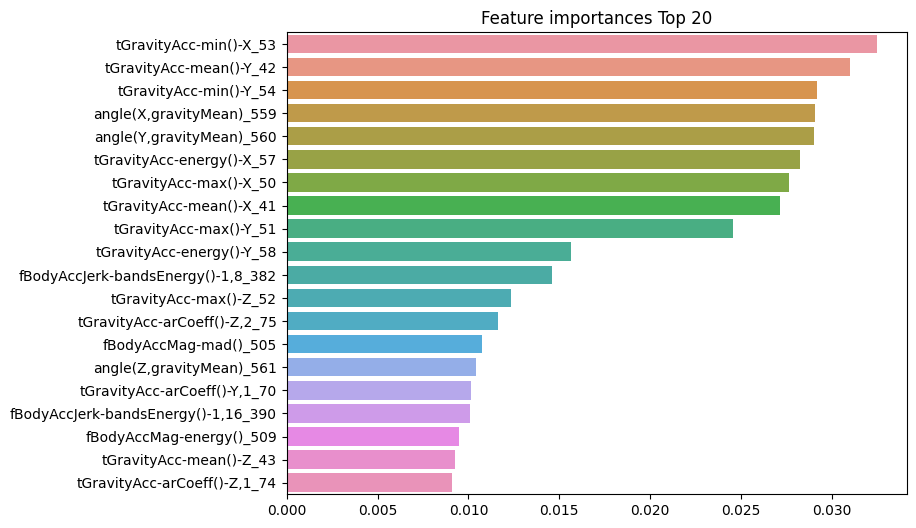

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# RandomForestClassifier에서 피처 중요도를 가져옵니다. Hint: rf_clf1.feature_importances_
ftr_importances_values = rf_clf1.feature_importances_

# 피처별 중요도를 시리즈로 변환합니다. 이때, index는 피처명으로 설정합니다.
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns )

# 피처 중요도가 높은 순으로 정렬하고, 상위 20개 피처만 선택합니다.
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

# 그래프의 크기를 (8,6)으로 설정합니다.
plt.figure(figsize=(8,6))

# 그래프의 제목을 'Feature importances Top 20'으로 설정합니다.
plt.title('Feature importances Top 20')

# seaborn의 barplot 함수를 이용해 피처 중요도를 막대그래프로 표시합니다. Hint: barplot
sns.barplot(x=ftr_top20 , y = ftr_top20.index)

# 그래프를 출력합니다.
plt.show()

# 부스팅(Boosting)

* 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서
잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 나가며 학습하
는 방식

# AdaBoost
*  Adaptive Boost의 줄임말로서 약한 학습기(weak learner)의 오류 데이터에
가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# clf를 AdaBoostClassifier로 설정하고, 각 조건을 입력
# 조건: n_estimators=30, random_state=10, learning_rate=0.1)
clf = AdaBoostClassifier(n_estimators=30,
                        random_state=10,
                        learning_rate=0.1)
#clf를 학습
clf.fit(X_train, y_train)

# 예측
pred = clf.predict(X_test)

# 정확도 출력
print('AdaBoost 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

AdaBoost 정확도: 0.7720


# Gradient Boost Machine(GBM)

*  AdaBoost와 유사하지만, 가중치 업데이트를 경사하강법(Gradient Descent)를
이용하여 최적화된 결과를 얻는 알고리즘
*  GBM은 예측 성능이 높지만 Greedy Algorithm으로 과적합이 빠르게 되고, 시
간이 오래 걸린다는 단점이 있음

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# DataFrame 함수를 사용하여 딕셔너리 형태의 데이터를 데이터프레임으로 변환
df = pd.DataFrame({
    "Height": [1.6,1.6,1.5,1.8, 1.5, 1.4],
    "Favorite Color":["Blue","Green","Blue","Red","Green","Blue"],
    "Gender":["Male","Female","Female","Male","Male","Female"],
    "Weight":[88,76,56,73,77,57]})
df = pd.get_dummies(df)
df

,Height,Weight,Favorite Color_Blue,Favorite Color_Green,Favorite Color_Red,Gender_Female,Gender_Male
0,1.6,88,1,0,0,0,1
1,1.6,76,0,1,0,1,0
2,1.5,56,1,0,0,1,0
3,1.8,73,0,0,1,0,1
4,1.5,77,0,1,0,0,1
5,1.4,57,1,0,0,1,0


In [ ]:
# x는 'Weight'가 아닌 모든 열을 선택
x = df.loc[:,df.columns!='Weight']

# 'Weight' 열을 y에 할당
y = df['Weight']

# np.mean 함수를 사용하여 'Weight'의 평균 값을 계산하고 이를 F0(초기예측값)에 할당
F0 = np.mean(y)
print(F0)

71.16666666666667


In [ ]:
# 잔차 계산 # 모델의 예측값과 실제 값 사이의 오차를 줄이는 데 사용하기 위함
r1 = y - F0

print(r1)
type(r1)

0    16.833333
1     4.833333
2   -15.166667
3     1.833333
4     5.833333
5   -14.166667
Name: Weight, dtype: float64


pandas.core.series.Series

In [ ]:
# DecisionTreeRegressor를 첫 번째 트리에 저장
tree1  = DecisionTreeRegressor (random_state = 433, max_depth = 2)

# 첫 번째 트리 학습
# 학습 데이터는 x, 예측 대상은 첫 번째 잔차인 r1
r1_fit = tree1.fit(x, r1)

# 학습된 모델 r1_fit을 이용해 x에 대한 예측값을 생성
gamma1  = r1_fit.predict(x)

print ('잔차 예측값:{}'.format(np.unique(gamma1)))

잔차 예측값:[-14.66666667   3.83333333   4.83333333  16.83333333]


In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(tree1, out_file="tree.dot", class_names=['Weight'], feature_names =['Height','Favorite Color_Blue','Favorite Color_Green','Favorite Color_Red','Gender_Female','Gender_Male'], impurity=True, filled=True)

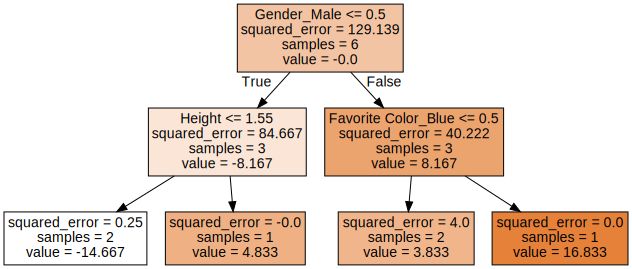

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# 학습률 eta를 설정. 이 값은 각 단계에서 얼마나 예측값을 갱신할지 결정하는 하이퍼파라미터
eta = 0.1

# 첫 번째 모델의 예측값에 학습률을 곱하여 갱신
# 그리고 이를 기존 예측값 F0에 더해서 새로운 예측값 F1을 계산
F1 = F0 + eta * gamma1

print ('첫번째 예측값:{}'.format(F1))

첫번째 예측값:[72.85 71.65 69.7  71.55 71.55 69.7 ]


In [ ]:
F_new = np.mean(y) #초기화 모형
tree = DecisionTreeRegressor(random_state=433, max_depth =2) #약한 학습기
eta = 0.1 #학습률

for t in range(100): #T = 100
    print(str(t+1)+'번째 업데이트')
    F_old = F_new
    r     = y - F_old        # 잔차
    r_fit = tree.fit(x,r)    # 잔차 적합
    gamma = r_fit.predict(x)
    print('잔차 예측값:{}'.format(np.round(np.unique(gamma),2)))

    F_new = F_old + eta * gamma # 새로운 예측값

    print('예측값:{}'.format(np.round(F_new,2)))

1번째 업데이트
잔차 예측값:[-14.67   3.83   4.83  16.83]
예측값:[72.85 71.65 69.7  71.55 71.55 69.7 ]
2번째 업데이트
잔차 예측값:[-13.2    3.45   4.35  15.15]
예측값:[74.37 72.09 68.38 71.9  71.9  68.38]
3번째 업데이트
잔차 예측값:[-11.88   3.1    3.91  13.63]
예측값:[75.73 72.48 67.19 72.21 72.21 67.19]
4번째 업데이트
잔차 예측값:[-10.69   2.79   3.52  12.27]
예측값:[76.96 72.83 66.12 72.48 72.48 66.12]
5번째 업데이트
잔차 예측값:[-9.62  2.52  3.17 11.04]
예측값:[78.06 73.15 65.16 72.74 72.74 65.16]
6번째 업데이트
잔차 예측값:[-8.66  2.26  2.85  9.94]
예측값:[79.05 73.43 64.29 72.96 72.96 64.29]
7번째 업데이트
잔차 예측값:[-7.79  2.04  2.57  8.95]
예측값:[79.95 73.69 63.52 73.17 73.17 63.52]
8번째 업데이트
잔차 예측값:[-7.02  1.83  2.31  8.05]
예측값:[80.75 73.92 62.81 73.35 73.35 62.81]
9번째 업데이트
잔차 예측값:[-6.31 -0.35  2.08  5.45]
예측값:[81.3  74.13 62.18 73.31 73.89 62.18]
10번째 업데이트
잔차 예측값:[-5.68  1.4   1.87  6.7 ]
예측값:[81.97 74.31 61.61 73.45 74.03 61.61]
11번째 업데이트
잔차 예측값:[-5.11 -0.45  1.69  4.5 ]
예측값:[82.42 74.48 61.1  73.41 74.48 61.1 ]
12번째 업데이트
잔차 예측값:[-4.6   1.05  1.52  5.58]
예측값:[82.98 74.6